# Clustering Analysis on Anime

In [ ]:
#distance to measure the difference between animes
df = pd.read_csv('anime_new.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head(3)

df_num = df.select_dtypes('number')
df_num.info()

df_num = df_num.dropna()
df_num.isnull().sum()

df_num.head(3)
df_num.describe

#22 columns
df_num.info()


ds = StandardScaler().fit_transform(df_num)
data_scaled = pd.DataFrame(ds,columns=df_num.columns)
data_scaled.describe().T

pca = PCA(0.95)
pcs = pca.fit_transform(ds)
varexp = pca.explained_variance_ratio_
pca.n_components_

plt.title("Cumulative Explained Variance")
plt.plot(range(1, len(varexp)+1), np.cumsum(varexp))
plt.axhline(.95)
plt.show()

columns_name = []
for i in range(pca.n_components_):
    columns_name.append('pca_'+ str(i+1))
pca_df = pd.DataFrame(pcs,columns=columns_name)

krange_pca = range(2,20)
inertia_pca =[]
silo_pca = []
for k in krange_pca:
    kmodel = KMeans(k)
    k_labs = kmodel.fit_predict(pca_df)
    inertia_pca.append(kmodel.inertia_)
    silo_pca.append(silhouette_score(pca_df,k_labs))

#Show Inertia plot
sns.lineplot(krange_pca,inertia_pca)
plt.title('k value and inertia')
plt.show()

#Show Silhouette plot
sns.lineplot(krange_pca, silo_pca)
plt.title('k value and silhouette score')
plt.show()

k4 = KMeans(4)
k4_labs = k4.fit_predict(pca_df)

skplt.metrics.plot_silhouette(pca_df, k4_labs, title="Kmeans-3", figsize=(15,5))
plt.show()


df_num['k4_labs'] = k4_labs
df_num['k4_labs'].value_counts(sort=False)

profile = df_num.groupby('k4_labs').mean().T
profile

plt.figure(figsize=(12, 6))
#pal = sns.color_palette("blue")
sns.heatmap(profile, center=0, xticklabels=profile.columns)
plt.title('Characteristics of 4 customer clusters')
plt.show()

# Clustering Analysis on Users

## Basic Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
animelist = pd.read_csv('/content/drive/Shareddrives/BA820 Team1/Raw data/animelist.csv')

In [ ]:
animelist.head()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


In [ ]:
popular = animelist['anime_id'].value_counts(sort = True, ascending = False)
pop = popular.to_frame(name = 'count').reset_index()
pop = pop.rename(columns={'index': 'anime_id'})
num_users = len(animelist['user_id'].unique())
pop['percentage'] = (pop['count']/num_users)*100
pop

,index,count
0,1535,238790
1,16498,216767
2,11757,209919
3,5114,201611
4,4224,196190
...,...,...
17557,48391,1
17558,48427,1
17559,41250,1
17560,47634,1


[Text(0, 0.5, 'Count of Anime'),
 Text(0.5, 0, 'Percentage of Users'),
 Text(0.5, 1.0, 'Distribution of Animes Watched by Percentage of Users')]

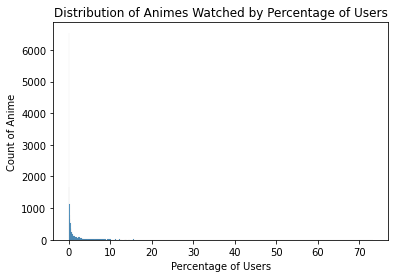

In [ ]:
sns.histplot(x = 'percentage', data = pop).set(title = 'Distribution of Animes Watched by Percentage of Users', xlabel = 'Percentage of Users', ylabel = 'Count of Anime')

[Text(0, 0.5, 'Count of Anime'),
 Text(0.5, 0, 'Percentage of Users'),
 Text(0.5, 1.0, 'Distribution of Animes Watched by Percentage of Users')]

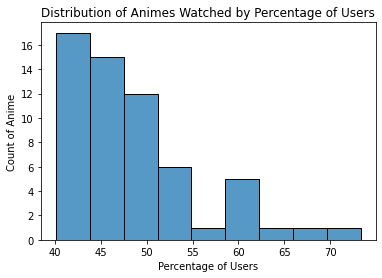

In [ ]:
selected = pop[pop['percentage'] >= 40]
sns.histplot(x = 'percentage', data = selected).set(title = 'Distribution of Animes Watched by Percentage of Users', xlabel = 'Percentage of Users', ylabel = 'Count of Anime')

In [ ]:
top = []

for i in pop['percentage']: 
  if i > 0.40:
    top.append(i)

In [ ]:
#top anime where viewer rate is above xx% 
most_pop = animelist['anime_id'].value_counts(sort = True, ascending = False).head(len(top))
pop_df = most_pop.to_frame('count').reset_index()
pop_list = pop_df['index'].to_list()
pop_anime = animelist.copy()
pop_anime.head()

,index,count
0,1535,238790
1,16498,216767
2,11757,209919
3,5114,201611
4,4224,196190
...,...,...
6928,11465,1308
6929,1295,1306
6930,2796,1306
6931,6686,1304


In [ ]:
pop_anime = animelist[animelist['anime_id'].isin(pop_list)]
pop_anime.shape

## Subset Data 

In [ ]:
#pop_anime = pd.read_csv('/content/drive/Shareddrives/BA820 Team1/Clean data/pop_anime40')

In [ ]:
pop_anime['user_id'].nunique()

In [ ]:
all_watched = pop_anime['user_id'].value_counts()
all = all_watched.to_frame(name = 'count').reset_index()

In [ ]:
all[all['count']==59].count()

In [ ]:
len(user_list)

In [ ]:
pop_anime = animelist[(animelist['anime_id'].isin(pop_list)) & animelist['user_id'].isin(user_list)]

In [ ]:
ratings = pop_anime.pivot_table(values = 'rating', index = 'user_id', columns = 'anime_id')

In [ ]:
ratings = pd.DataFrame(ratings)

In [ ]:
ratings.head()

In [ ]:
ratings.shape

## Clustering 

In [ ]:
##Hierarchical clustering 
pop_anime_clust = ratings.copy()

In [ ]:
pop_anime_clust.astype(int)

In [ ]:
cdist = pdist(pop_anime_clust.values, metric = 'jaccard')


In [ ]:
hc1 = linkage(cdist)
hc2 = linkage(cdist, method = 'complete')
hc3 = linkage(cdist, method = 'average')
hc4 = linkage(cdist, method = 'ward') 

In [ ]:
plt.figure(figsize=(5,6))
plt.title('Single')
single = dendrogram(hc1)

In [ ]:
plt.figure(figsize=(5,6))
plt.title('Complete')
complete = dendrogram(hc2)

In [ ]:
plt.figure(figsize=(5,6))
plt.title('Average')
average = dendrogram(hc3)

In [ ]:
plt.figure(figsize=(5,6))
plt.title('Ward - Jaccard')
ward = dendrogram(hc4)

In [ ]:
#setting clusters by the number of clusters we want 
c1 = fcluster(hc1, 3, criterion = 'maxclust')

In [ ]:
pop_anime_clust['cluster'] = c1

In [ ]:
##KMeans Clustering 
pop_anime_kmeans = ratings.copy()

In [ ]:
#examine how many clusters would be appropriate to use based on inertia
#ideal is low inertia while having low number of k
krange = range(2,100)

cluster_sol = []

for k in krange:
  x = KMeans(k)
  x.fit(pop_anime_kmeans)
  x.predict(pop_anime_kmeans)
  y = x.inertia_
  cluster_sol.append(y)

cluster_sol

In [ ]:
sns.lineplot(krange, cluster_sol).set_title('Number of Clusters to Inertia of Fit')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [ ]:
#edit with number of clusters 
k = KMeans(5)
labs = k.fit_predict(pop_anime_kmeans)

In [ ]:
pop_anime_kmeans['k'] = labs

In [ ]:
#use silo score to access how appropriately the clusters were assigned based on 5 clusters
#pass through silhouette_score(feature space, cluster assignment)
#want silo to be as close as 1 as possible 
silo_overall = metrics.silhouette_score(pop_anime_kmeans, labs)
silo_overall

In [ ]:
#plotting 
skplt.metrics.plot_silhouette(pop_anime_kmeans, labs, figsize = (10,6))

# Recommendation system 1
Colaboraive Filtering using the structure of knn

### Raw Code for Recommendation System

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def change(s):
  t=set(s[1:-1].split(", "))
  return t
# Use class to make the system
class recommend_system:

# favorite is the favorite anime the new user select, we would get this in the following inputfavorite method
# alist is the data set we use to find the similar users, it's called userlist. The path of this dataset is the only argument we need
# recommendlist is the final recommand anime we got
  def __init__(self,path):
    self.favorite=set()
    self.alist=pd.read_csv(path)
    self.recommendlist=pd.DataFrame()
    self.alist['animelist']=self.alist['animelist'].apply(change)
    self.knn=60

# Get the new user's favorite anime. Take int as input
  def inputfavorite(self):
    favorite = []
    s = input('Please input your favorite anime id:')
    while s != '-1':
      self.favorite.add(s)
      s = input('Please input more anime id (type -1 to  stop):')
    self.alist['jacdis'] = self.alist['animelist'].apply(self.distance)
    self.recommend = self.alist
    self.alist.sort_values('jacdis', ascending=False, inplace=True)
    self.alist.reset_index(drop=True,inplace=True)

# Distance calculating functions we use to determine which are the similar users
  def distance(self,y):
    return 2*len(self.favorite & y)/(len(self.favorite)+len(self.favorite | y))

# Output method of our recommendation system. 
# Select the most similar users in the dataset and get the intersection of their favorite list
# The intersection is the result and every time we only print 3 of them.
  def recommendation(self):
    k_in_knn=self.knn
    self.recommenddict=dict()
    for i in range(0,k_in_knn):
      for id in self.alist['animelist'][i]:
        try:
          self.recommenddict[id]+=1
        except:
          self.recommenddict[id]=1
    for id in self.favorite:
      try:
        del self.recommenddict[id]
      except:
        pass
    self.recommendlist=pd.DataFrame(data=self.recommenddict,index=['Recommend Ratio']).T
    self.recommendlist['Recommend Ratio']=self.recommendlist['Recommend Ratio']/k_in_knn
    self.recommendlist.sort_values('Recommend Ratio',ascending=False,inplace=True)
    print(self.recommendlist)
  def tranfer(self):
    self.anime_name=pd.read_csv('/content/drive/MyDrive/BA820 Project/anime.csv')
    self.anime_name=anime_name[['MAL_ID','Name','Score']]
    self.anime_name['MAL_ID'].astype('int64')
    self.recommand_name=self.recommendlist.merge(anime_name,how='inner',on='MAL_ID')

### Raw Code for Evaluation

In [ ]:
def evaluate(klist):
  evaluation=recommend_system('/content/drive/MyDrive/BA820 Project/userlist.csv')
  data=pd.read_csv('/content/drive/MyDrive/BA820 Project/userlist.csv')
  data['animelist']=data['animelist'].apply(change)

  test=data.sample(n=10, replace=False,axis=0,random_state=830)
  train = data[~ data['user_id'].isin(test['user_id'])]

  test.index=test['user_id']
  train.index=train['user_id']
  average_score=dict()
  evaluation.alist=evaluation.alist[~ evaluation.alist['user_id'].isin(test['user_id'])]
  for k in klist:
    evaluation.knn=k
    socrelist=[]
    for i in test.index:
      l=list(t for t in test['animelist'][i])
      selectlist=set(l[0:10])
      testlist=set(l[10:])

      evaluation.favorite=selectlist
      evaluation.alist['jacdis'] = evaluation.alist['animelist'].apply(evaluation.distance)
      evaluation.recommend = evaluation.alist
      evaluation.alist.sort_values('jacdis', ascending=False, inplace=True)
      evaluation.alist.reset_index(drop=True,inplace=True)
      evaluation.recommendation()
      evaluation.recommendlist.reset_index(inplace=True)
      result=list(i for i in evaluation.recommendlist[0:10]['index'])
      score=0
      for i in result:
        if i in testlist:
          score+=1
      socrelist.append(score)
    average_score[k]=np.mean(socrelist)
  return average_score

### Evaluation

In [ ]:
klist=range(0,200,10)
score_list1=evaluate(klist)
data1=pd.DataFrame(score_list1,index=['Score']).T

Text(0, 0.5, 'Evaluation Score')

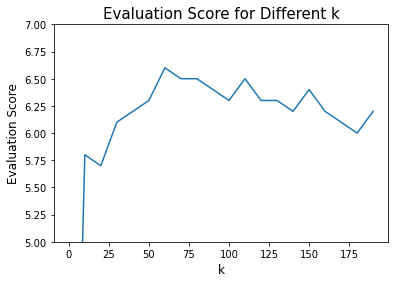

In [ ]:
plt.plot(data1)
plt.ylim(5,7)
plt.title('Evaluation Score for Different k',size=15)
plt.xlabel('k',size=12)
plt.ylabel('Evaluation Score',size=12)

### Example Excuation

In [ ]:
re=recommend_system('/content/drive/MyDrive/BA820 Project/userlist.csv')

In [ ]:
# Enter the ID of your favorite anime, enter -1 to stop
re.inputfavorite()

Please input your favorite anime id:35
Please input more anime id (type -1 to  stop):135
Please input more anime id (type -1 to  stop):35
Please input more anime id (type -1 to  stop):-1


In [ ]:
# Returns our recommendations. The ratio reflect the recommend level
re.recommendation()

       Recommend Ratio
121           0.883333
1535          0.516667
199           0.283333
2904          0.266667
1575          0.266667
...                ...
239           0.016667
2158          0.016667
11665         0.016667
3167          0.016667
208           0.016667

[340 rows x 1 columns]


# Recommendation system 2
Anime based recommendation using text-analysis

1. All libraries
2. Import dataset
3. Clean dataset
4. Cosine similarity

### All libraries

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from spacy.lemmatizer import Lemmatizer
import spacy
nlp = spacy.load('en')
from sklearn.metrics.pairwise import cosine_similarity
from spacy import cli

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd 
df=pd.read_csv('/content/drive/Shareddrives/BA820 Team1/Raw data/anime_with_synopsis.csv')
data = df

In [ ]:
df.shape

(16214, 5)

In [ ]:
df.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'sypnopsis'], dtype='object')

### Clean dataset

Take out the 6k animes with the highest rating in all 16215 animes in anime_with_synopsis.csv

In [ ]:
df = df[df['Score'] != 'Unknown']
df = df.sort_values(by='Score', ascending=False)
df = df.iloc[:6000]

In [ ]:
pd.set_option('max_colwidt', None)
df['new_id']= np.arange(1, 6001)
df

,MAL_ID,Name,Score,Genres,sypnopsis,new_id
3446,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen","""In order for something to be obtained, something of equal value must be lost."" Alchemy is bound by this Law of Equivalent Exchange—something the young brothers Edward and Alphonse Elric only realize after attempting human transmutation: the one forbidden act of alchemy. They pay a terrible price for their transgression—Edward loses his left leg, Alphonse his physical body. It is only by the desperate sacrifice of Edward's right arm that he is able to affix Alphonse's soul to a suit of armor. Devastated and alone, it is the hope that they would both eventually return to their original bodies that gives Edward the inspiration to obtain metal limbs called ""automail"" and become a state alchemist, the Fullmetal Alchemist. Three years of searching later, the brothers seek the Philosopher's Stone, a mythical relic that allows an alchemist to overcome the Law of Equivalent Exchange. Even with military allies Colonel Roy Mustang, Lieutenant Riza Hawkeye, and Lieutenant Colonel Maes Hughes on their side, the brothers find themselves caught up in a nationwide conspiracy that leads them not only to the true nature of the elusive Philosopher's Stone, but their country's murky history as well. In between finding a serial killer and racing against time, Edward and Alphonse must ask themselves if what they are doing will make them human again... or take away their humanity.",1
14647,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen","Gabi Braun and Falco Grice have been training their entire lives to inherit one of the seven titans under Marley's control and aid their nation in eradicating the Eldians on Paradis. However, just as all seems well for the two cadets, their peace is suddenly shaken by the arrival of Eren Yeager and the remaining members of the Survey Corps. Having finally reached the Yeager family basement and learned about the dark history surrounding the titans, the Survey Corps has at long last found the answer they so desperately fought to uncover. With the truth now in their hands, the group set out for the world beyond the walls. In Shingeki no Kyojin: The Final Season , two utterly different worlds collide as each party pursues its own agenda in the long-awaited conclusion to Paradis' fight for freedom.",2
4953,9253,Steins;Gate,9.11,"Thriller, Sci-Fi","The self-proclaimed mad scientist Rintarou Okabe rents out a room in a rickety old building in Akihabara, where he indulges himself in his hobby of inventing prospective ""future gadgets"" with fellow lab members: Mayuri Shiina, his air-headed childhood friend, and Hashida Itaru, a perverted hacker nicknamed ""Daru."" The three pass the time by tinkering with their most promising contraption yet, a machine dubbed the ""Phone Microwave,"" which performs the strange function of morphing bananas into piles of green gel. Though miraculous in itself, the phenomenon doesn't provide anything concrete in Okabe's search for a scientific breakthrough; that is, until the lab members are spurred into action by a string of mysterious happenings before stumbling upon an unexpected success—the Phone Microwave can send emails to the past, altering the flow of history. Adapted from the critically acclaimed visual novel by 5pb. and Nitroplus, Steins;Gate takes Okabe through the depths of scientific theory and practicality. Forced across the diverging threads of past and present, Okabe must shoulder the burdens that come with holding the key to the realm of time.",3
13720,38524,Shingeki no Kyojin Season 3 Part 2,9.1,"Action, Drama, Fantasy, Military, Mystery, Shounen, Super Power","Seeking to restore humanity's diminishing hope, the Survey Corps embark on a mission to retake Wall Maria, where the battle against the merciless ""Titans"" takes the stage once again. Retu

In [ ]:
df.shape

(6000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 3446 to 11323
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MAL_ID     6000 non-null   int64 
 1   Name       6000 non-null   object
 2   Score      6000 non-null   object
 3   Genres     6000 non-null   object
 4   sypnopsis  6000 non-null   object
 5   new_id     6000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 328.1+ KB


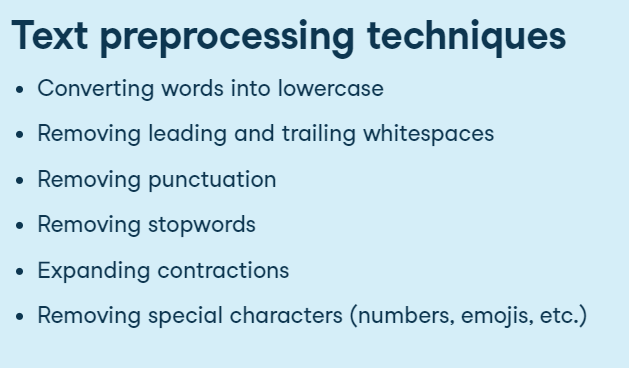

In [ ]:
# Convert words into lowercase
df['sypnopsis'] = df['sypnopsis'].str.lower()

In [ ]:
model = "en_core_web_md"
cli.download(model)

nlp = spacy.load(model)

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
# # Remove all words that are not alphabet (including japanese words and punctuations)
pd.set_option('max_colwidt', None)
df['sypnopsis'] = df['sypnopsis'].str.replace('—', ' ')
df['sypnopsis'] = df['sypnopsis'].str.replace('[^a-zA-Z\ ]', '')

In [ ]:
# Remove all English stopwords
STOPWORDS = list(stopwords.words('english'))
# We will add this to the countvectorizer param later

In [ ]:
# Lemmatization
nlp = spacy.load('en')

df['sypnopsis'] = df['sypnopsis'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))
df['sypnopsis'] = df['sypnopsis'].str.replace('-PRON-', '')

In [ ]:
#fit transform from text column to make dtm

cv = CountVectorizer(stop_words=STOPWORDS)
dtm = cv.fit_transform(df['sypnopsis'])
cv.vocabulary_
dtm.toarray()[:5, :5]

dtm_df = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names())
dtm_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aachi,aarinfantasy,aaron,aasu,aback,abandon,abandoned,abarai,abarenbou,abash,abbott,abbreviate,abduct,abducted,abduction,abductor,abducts,abdul,abdullah,abe,abel,abema,abematv,abeno,abenobashi,abenos,aberrant,aberration,abh,abhor,abide,abigail,abilitie,ability,abillity,abiru,ablaze,able,...,zoo,zoom,zor,zora,zorbados,zordar,zorndyke,zorndykes,zoro,zoroark,zorocia,zorori,zorro,zorua,zoruas,zouroku,zre,zs,zu,zuberg,zubu,zuellni,zuerst,zufu,zuho,zuisouroku,zukan,zuki,zum,zun,zundar,zuo,zuru,zusa,zutto,zuuma,zvezda,zwei,zygarde,zz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(cv.vocabulary_)

28720

### Cosine similarity




In [ ]:
cs = cosine_similarity(dtm)
# Let's try seeing it out
cs

array([[1.        , 0.0369914 , 0.04850534, ..., 0.09598157, 0.01531589,
        0.02092549],
       [0.0369914 , 1.        , 0.02731792, ..., 0.14414999, 0.        ,
        0.06285394],
       [0.04850534, 0.02731792, 1.        , ..., 0.04922347, 0.01885115,
        0.01287779],
       ...,
       [0.09598157, 0.14414999, 0.04922347, ..., 1.        , 0.02486824,
        0.13590592],
       [0.01531589, 0.        , 0.01885115, ..., 0.02486824, 1.        ,
        0.        ],
       [0.02092549, 0.06285394, 0.01287779, ..., 0.13590592, 0.        ,
        1.        ]])

In [ ]:
# Get the title of the anime that user likes
title = 'Fullmetal Alchemist: Brotherhood'

# Find the title id
anime_id = df[df['Name'] == title]['new_id'].values[0]
print(anime_id)



1


In [ ]:
# Create a list of enumerations for the similartiy score [(movie_id, similarity_score, (...)....]

scores = enumerate(cs[anime_id])
sorted_scores = sorted(scores, key = lambda x:x[1], reverse=True)
print(sorted_scores[0][0])

[(1, 0.999999999999999), (891, 0.31278103893903675), (120, 0.297226442770842), (73, 0.26600795837367097), (3, 0.24444444444444444), (113, 0.23783535600422523), (2974, 0.2140537663559785), (1102, 0.20433447413392491), (2858, 0.20289921431117264), (5112, 0.20108311560592995), (3425, 0.1978141420187361), (839, 0.18973665961010278), (1827, 0.18675981112953638), (2248, 0.18164975363768868), (164, 0.18108375938575813), (4291, 0.1803209153582371), (4834, 0.17690759253434063), (3433, 0.17303618253948005), (317, 0.17085642859406608), (3126, 0.16735967034880078), (5758, 0.16329931618554522), (3245, 0.16265001215808886), (3732, 0.1619823647168121), (771, 0.1606728931832706), (2639, 0.16035674514745463), (418, 0.15811388300841897), (2141, 0.15689290811054724), (1361, 0.1545175115501844), (3718, 0.1542271319530149), (2280, 0.15422713195301488), (1044, 0.1539600717839002), (2085, 0.15391767605907491), (4103, 0.15357377920848778), (4544, 0.1532064692570853), (3350, 0.15214515486254615), (3566, 0.1504

### Recommendation

In [ ]:
def recommend(anime):
    anime_id = df[df['Name'] == anime]['new_id'].values[0]
    distances = sorted(list(enumerate(cs[anime_id])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
      print(df[df['new_id'] == i[0]]['Name'].values[0])
    

recommend('Shingeki no Kyojin')

Tamayura: Sotsugyou Shashin Part 3 - Akogare
Lupin III: Sweet Lost Night - Mahou no Lamp wa Akumu no Yokan
Taiho Shichau zo (TV)
Mobile Suit Gundam Wing: Endless Waltz
Kuroko no Basket Movie 4: Last Game
